Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.

Epoch 1/10


1875/1875 [==============================] - 286s 152ms/step - loss: 0.6316 - accuracy: 0.8342 - val_loss: 0.3225 - val_accuracy: 0.9113
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2934 - accuracy: 0.9151 - val_loss: 0.2537 - val_accuracy: 0.9277
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2412 - accuracy: 0.9308 - val_loss: 0.2152 - val_accuracy: 0.9384
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2075 - accuracy: 0.9402 - val_loss: 0.1893 - val_accuracy: 0.9452
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1819 - accuracy: 0.9474 - val_loss: 0.1731 - val_accuracy: 0.9485
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1625 - accuracy: 0.9530 - val_loss: 0.1541 - val_accuracy: 0.9549
Epoch 7/10
1875/1875 [=========

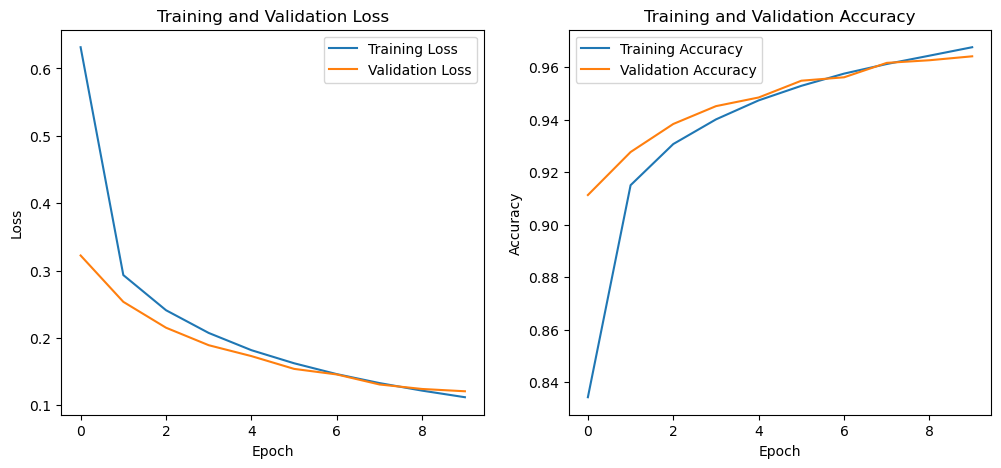

In [2]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# b. Load the training and testing data
train_dir = r'C:\Users\ameyp\DL in AI Lab\Modified\mnist-jpg\train'
test_dir = r'C:\Users\ameyp\DL in AI Lab\Modified\mnist-jpg\test'

# Image data generator for rescaling and loading data
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# c. Define the network architecture using Keras
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),        # Flatten the 28x28 images
    Dense(128, activation='relu'),           # First hidden layer
    Dense(64, activation='relu'),            # Second hidden layer
    Dense(10, activation='softmax')          # Output layer for 10 classes (0-9)
])

# d. Train the model using SGD
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# f. Plot the training loss and accuracy
# Plotting training & validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


1/1 [==============================] - 0s 148ms/step


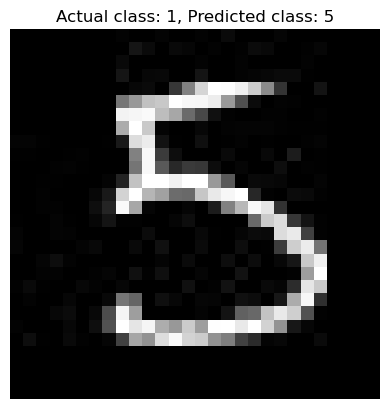

Image: C:/Users/ameyp/DL in AI Lab/Modified/15.jpg, Actual class: 1, Predicted class: 5


In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image
img_path = r"C:/Users/ameyp/DL in AI Lab/Modified/15.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Rescale as done in training
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Replace this with the actual class if you have it
actual_class = 1  # Example actual class, replace as needed

# Display the image with the prediction and actual class
plt.imshow(img, cmap='gray')
plt.title(f"Actual class: {actual_class}, Predicted class: {predicted_class}")
plt.axis('off')  # Hide axes
plt.show()

# Print prediction result in console as well
print(f"Image: {img_path}, Actual class: {actual_class}, Predicted class: {predicted_class}")
